# Neural network Example
Xây dựng một mô hình neural network đơn giản có 2 hidden layer sử dụng tensorflow Ví dụ này sử dụng bộ dữ liệu MNIST
Code này sẽ sử dụng estimator api của TF

In [2]:
from __future__ import print_function
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=False)

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [3]:
# Parameters - Khởi tạo các tham số cho model
learning_rate = 0.1
num_steps = 1000
batch_size = 128
display_step = 100

# Network Parameters
n_hidden_1 = 256 # 1st layer number of neurons
n_hidden_2 = 256 # 2nd layer number of neurons
num_input = 784 # MNIST data input (img shape: 28*28)
num_classes = 10 # MNIST total classes (0-9 digits)

In [4]:
# Định nghĩa hàm input cho model
input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'images': mnist.train.images}, y=mnist.train.labels,
    batch_size=batch_size, num_epochs=None, shuffle=True)

In [5]:
# Định nghĩa mạng neural network
def neural_net(x_dict):
    # TF Estimator input is a dict, in case of multiple inputs
    x = x_dict['images']
    # Hidden fully connected layer with 256 neurons
    layer_1 = tf.layers.dense(x, n_hidden_1)
    # Hidden fully connected layer with 256 neurons
    layer_2 = tf.layers.dense(layer_1, n_hidden_2)
    # Output fully connected layer with a neuron for each class
    out_layer = tf.layers.dense(layer_2, num_classes)
    return out_layer

In [6]:
# Định nghĩa hàm thực thi cho model (following TF Estimator Template)
def model_fn(features, labels, mode):
    
    # Build the neural network
    logits = neural_net(features)
    
    # Predictions - Dự đoán + Xác suất dự đoán
    pred_classes = tf.argmax(logits, axis=1)
    pred_probas = tf.nn.softmax(logits)
    
    # Nếu mode là dự đoán, gọi hàm dự đoán
    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode, predictions=pred_classes) 
        
    # Định nghĩa loss và optimizer
    loss_op = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
        logits=logits, labels=tf.cast(labels, dtype=tf.int32)))
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
    train_op = optimizer.minimize(loss_op, global_step=tf.train.get_global_step())
    
    # Đánh giá độ chính xác của model
    acc_op = tf.metrics.accuracy(labels=labels, predictions=pred_classes)
    
    # TF Estimators requires to return a EstimatorSpec, that specify
    # the different ops for training, evaluating, ...
    estim_specs = tf.estimator.EstimatorSpec(
      mode=mode,
      predictions=pred_classes,
      loss=loss_op,
      train_op=train_op,
      eval_metric_ops={'accuracy': acc_op})

    return estim_specs

In [7]:
# Build the Estimator
model = tf.estimator.Estimator(model_fn)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_tf_random_seed': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_master': '', '_save_checkpoints_secs': 600, '_task_id': 0, '_save_summary_steps': 100, '_evaluation_master': '', '_model_dir': 'C:\\Users\\Admin\\AppData\\Local\\Temp\\tmpdn2u13_j', '_service': None, '_global_id_in_cluster': 0, '_log_step_count_steps': 100, '_is_chief': True, '_save_checkpoints_steps': None, '_session_config': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000283280DD278>, '_num_ps_replicas': 0, '_num_worker_replicas': 1, '_task_type': 'worker'}


In [8]:
# Train the Model
model.train(input_fn, steps=num_steps)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\Admin\AppData\Local\Temp\tmpdn2u13_j\model.ckpt.
INFO:tensorflow:step = 1, loss = 2.3654635
INFO:tensorflow:global_step/sec: 236.457
INFO:tensorflow:step = 101, loss = 0.42404163 (0.425 sec)
INFO:tensorflow:global_step/sec: 276.328
INFO:tensorflow:step = 201, loss = 0.2505305 (0.355 sec)
INFO:tensorflow:global_step/sec: 303.251
INFO:tensorflow:step = 301, loss = 0.22014359 (0.331 sec)
INFO:tensorflow:global_step/sec: 335.677
INFO:tensorflow:step = 401, loss = 0.2994092 (0.298 sec)
INFO:tensorflow:global_step/sec: 339.091
INFO:tensorflow:step = 501, loss = 0.23452984 (0.295 sec)
INFO:tensorflow:global_step/sec: 345.68
INFO:tensorflow:step = 601, loss = 0.28105476 (0.288 sec)
INFO:tensorflow:global_st

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Admin\AppData\Local\Temp\tmpdn2u13_j\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


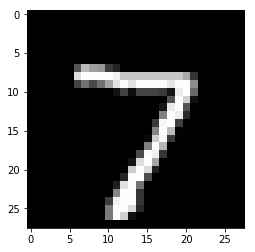

Model prediction: 7


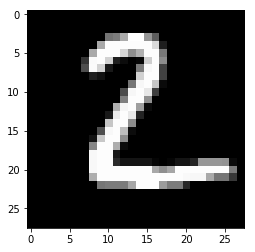

Model prediction: 2


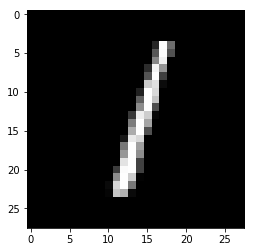

Model prediction: 1


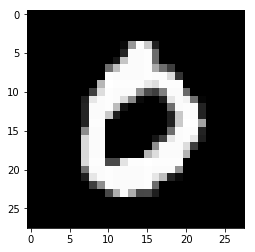

Model prediction: 0


In [9]:
# Predict single images
n_images = 4
# Get images from test set
test_images = mnist.test.images[:n_images]
# Prepare the input data
input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'images': test_images}, shuffle=False)
# Use the model to predict the images class
preds = list(model.predict(input_fn))

# Display
for i in range(n_images):
    plt.imshow(np.reshape(test_images[i], [28, 28]), cmap='gray')
    plt.show()
    print("Model prediction:", preds[i])